<a href="https://colab.research.google.com/github/hyeji0913/AI_studying/blob/main/multi_variable_3d_chart%26predict_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.mount drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Jun 29 01:30 data_202001.csv
-rw------- 1 root root    314682 Jun 29 02:48 data_202002.csv
-rw------- 1 root root    335953 Jun 29 05:52 data_202003.csv
-rw------- 1 root root    988308 Jun 29 05:52 data_2020.csv
-rw------- 1 root root 783889122 Jun 27 00:30 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jun 27 00:50 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jun 27 01:01 TCS_영업소간통행시간_1시간_1개월_202003


#2.korean characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,165 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rc('font', family='NanumBarunGothic')

#3.load data

In [6]:
import pandas as pd

In [7]:
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [8]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [9]:
data['도착영업소코드'] = data['도착영업소코드'].map({105:20,110:77,115:135,120:185,125:240,130:215,135:339,140:407})

In [10]:
data.rename(columns={'도착영업소코드':'거리'},inplace=True)

In [11]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [12]:
data_destination = data[data['거리'].isin([407])]

In [13]:
data_destination.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2


In [14]:
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()

In [15]:
data_time

집계시  요일  거리 
0    0   407    14900.363636
     1   407    15585.857143
     2   407    14590.142857
     3   407    14780.769231
     4   407    15573.666667
                    ...     
23   2   407    16055.416667
     3   407    16782.777778
     4   407    15770.916667
     5   407    15222.500000
     6   407    15161.000000
Name: 통행시간, Length: 168, dtype: float64

In [16]:
data_distance = data_time.unstack(level=-1)

In [17]:
data_distance

거리               407
집계시 요일              
0   0   14900.363636
    1   15585.857143
    2   14590.142857
    3   14780.769231
    4   15573.666667
...              ...
23  2   16055.416667
    3   16782.777778
    4   15770.916667
    5   15222.500000
    6   15161.000000

[168 rows x 1 columns]

In [18]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   14900.363636
    1   15585.857143
    2   14590.142857
    3   14780.769231
    4   15573.666667
...              ...
23  2   16055.416667
    3   16782.777778
    4   15770.916667
    5   15222.500000
    6   15161.000000

[168 rows x 1 columns]

In [19]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   14900.363636
    1   15585.857143
    2   14590.142857
    3   14780.769231
    4   15573.666667
...              ...
23  2   16055.416667
    3   16782.777778
    4   15770.916667
    5   15222.500000
    6   15161.000000

[168 rows x 1 columns]

In [20]:
data_out = data_distance.reset_index()

In [21]:
data_out

거리,집계시,요일,407
0,0,0,14900.363636
1,0,1,15585.857143
2,0,2,14590.142857
3,0,3,14780.769231
4,0,4,15573.666667
...,...,...,...
163,23,2,16055.416667
164,23,3,16782.777778
165,23,4,15770.916667
166,23,5,15222.500000


In [22]:
data_list = data_out.values.tolist()

In [23]:
data_list[:5]

[[0.0, 0.0, 14900.363636363636],
 [0.0, 1.0, 15585.857142857143],
 [0.0, 2.0, 14590.142857142857],
 [0.0, 3.0, 14780.76923076923],
 [0.0, 4.0, 15573.666666666666]]

In [25]:
x_train = [ r[:2] for r in data_list ]
y_train = [ r[-1] for r in data_list ]

In [26]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [14900.363636363636,
  15585.857142857143,
  14590.142857142857,
  14780.76923076923,
  15573.666666666666])

In [27]:
x1 = [ r[0] for r in data_list ]
x2 = [ r[1] for r in data_list ]
y = [ r[-1] for r in data_list]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

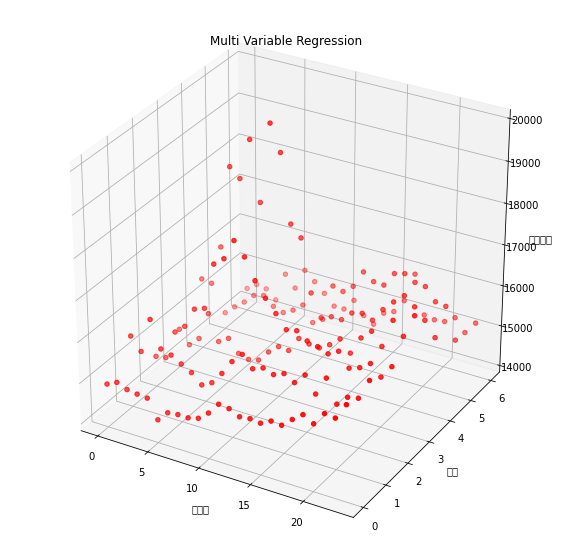

In [28]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title('Multi Variable Regression')
ax.set_xlabel('집계시')
ax.set_ylabel('요일')
ax.set_zlabel('통행시간')
plot = ax.scatter3D(x1, x2, y, c='r')
plt.show()


#4. multi variable using tensorflow

In [29]:
import tensorflow as tf
import numpy as np


In [30]:
learning_rate = 1e-6
learning_epochs = 2000

In [31]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
6/6 [==============================] - 1s 4ms/step - loss: 244463744.0000
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 243603536.0000
Epoch 3/2000
6/6 [==============================] - 0s 4ms/step - loss: 242746608.0000
Epoch 4/2000
6/6 [==============================] - 0s 4ms/step - loss: 241900448.0000
Epoch 5/2000
6/6 [==============================] - 0s 5ms/step - loss: 241106944.0000
Epoch 6/2000
6/6 [==============================] - 0s 3ms/step - loss: 240292112.0000
Epoch 7/2000
6/6 [==============================] - 0s 2ms/step - loss: 239440480.0000
Epoch 8/2000
6/6 [==============================] - 0s 2ms/step - loss: 238590416.0000
Epoch 9/2000
6/6 [==============================] - 0s 3ms/step - loss: 237778240.0000
Epoch 10/2000
6/6 [==============================] - 0s 2ms/step - loss: 236959840.0000
Epoch 11/2000
6/6 [==============================] - 0s 2ms/step - loss: 236154416.0000
Epoch 12/2000
6/6 [======================

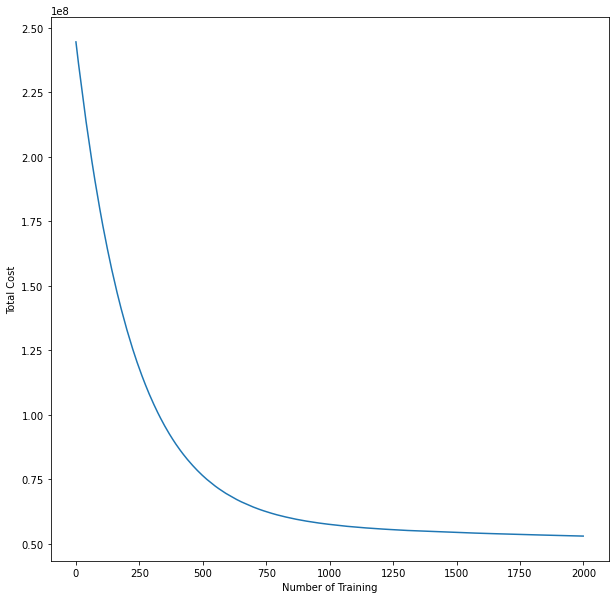

In [34]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.ylabel('Total Cost')
plt.xlabel('Number of Training')
plt.show()

In [36]:
print("%20s %20s" %('Setp','Cost')+'\n')
for step in range(learning_epochs):
    if step % 100 == 0 :
      cost_val = history.history['loss'][step]
      print("%20i %20.5f" %(step,cost_val))

                Setp                 Cost

                   0      244463744.00000
                 100      176469808.00000
                 200      133201168.00000
                 300      105518824.00000
                 400       87754072.00000
                 500       76360600.00000
                 600       68980536.00000
                 700       64191532.00000
                 800       61026756.00000
                 900       58929620.00000
                1000       57507908.00000
                1100       56489228.00000
                1200       55766424.00000
                1300       55201616.00000
                1400       54759016.00000
                1500       54389420.00000
                1600       54062968.00000
                1700       53764876.00000
                1800       53491244.00000
                1900       53234516.00000


In [37]:
Time = 14 #@param {type:"slider",min:0,max:23,step:1}
Day = 3 #@param {type:"slider",min:0,max:6,step:1}


In [39]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
data_out[time_condition & day_condition]

거리,집계시,요일,407
101,14,3,15348.066667


In [44]:
input = [Time, Day]
time = model.predict([input])
ml_time = time[0][0]
week_days = ['월','화','수','목','금','토','일']
print("%10s %10s %50s" % ('집계시','요일','서울에서 부산까지 통행시간')+'\n')
print("%10s %10s %50s" % ( str(Time),week_days[Day], str(ml_time)))


       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                           14204.91
